In [1]:
import gpxpy
import matplotlib.pyplot as plt
import datetime
from geopy import distance
from math import sqrt, floor
import numpy as np
import pandas as pd
import haversine
import gmplot

In [2]:
# Import GPX file from Garmin Connect, load and parse
gpx_file = open('/Users/pinheirochagas/Pedro/Stanford/code/garmin/activity_4652031272.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

In [4]:
# Convert to pandas df
data = []
track = gpx.tracks[0]
segment = track.segments[0]

for point_idx, point in enumerate(segment.points):
    data.append([point.longitude, point.latitude,
                 point.elevation, point.time, segment.get_speed(point_idx)])
columns = ['lon', 'lat', 'alt', 'time', 'speed']
df = pd.DataFrame(data, columns=columns) 

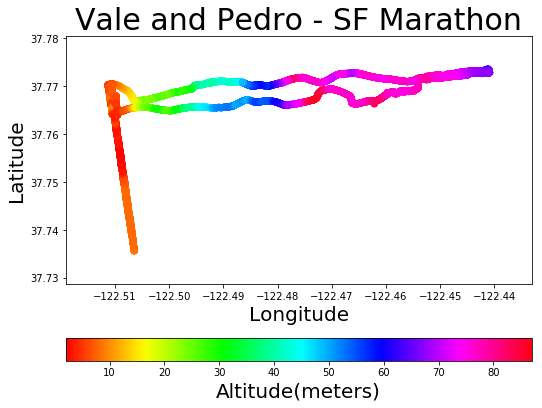

In [5]:
# Plot some
plt.figure(figsize = (14, 12))
plt.scatter(df['lon'], df['lat'],c=df['alt'], cmap='hsv')
cbar = plt.colorbar(orientation='horizontal')
font = {'family' : 'serif',
        'weight': 'regular',
        'size'   : 12}
plt.rc('font', **font)
plt.title('Vale and Pedro - SF Marathon', fontsize = 30)
plt.xlabel('Longitude', fontsize = 20)
plt.ylabel('Latitude', fontsize = 20)
cbar.set_label('Altitude(meters)', fontsize = 20)
plt.tight_layout(pad=20, w_pad=1, h_pad=11)